In [61]:
!pip install xgboost

In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Data Collection and Processing 


In [63]:
# loading the data fro csv file to Pandas DataFrame
calories = pd.read_csv('F:\datasets\Calories burnt\calories.csv')
# print first 10 rows of dataframe
calories.head(10)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
5,15130815,123.0
6,19602372,112.0
7,11117088,143.0
8,12132339,134.0
9,17964668,72.0


In [64]:
#
exercise_data  = pd.read_csv("F:\datasets\Calories burnt\exercise.csv")
exercise_data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2


Combinig the two dataframes

In [65]:
calories = pd.concat([exercise_data, calories['Calories']],axis = 1)
calories.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


In [66]:
# checking the number of rows and columns
calories.shape

(15000, 9)

In [67]:
# getting some information about the data
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [68]:
#checking the missing values 
calories.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

DATA ANALYSIS

In [69]:
# get some statistical measures about the  data
calories.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

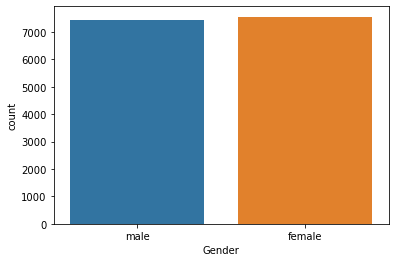

In [70]:
# plotting the gender column in count plot
sns.countplot(calories['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

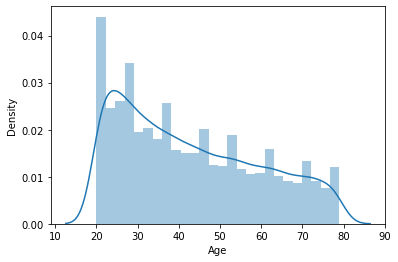

In [71]:
# finding the distribution of AGE column
sns.distplot(calories['Age'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

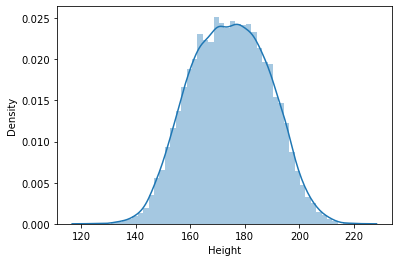

In [72]:
# finding the distribution of height column
sns.distplot(calories['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

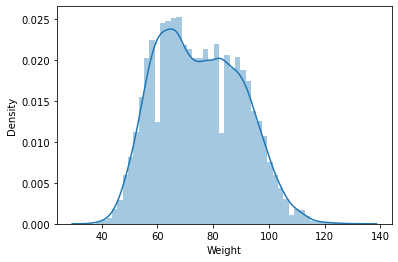

In [73]:
# finding the distribution of Weight column
sns.distplot(calories['Weight'])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

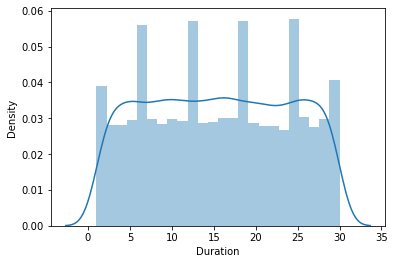

In [74]:
# finding the distribution of Duration column
sns.distplot(calories['Duration'])

<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

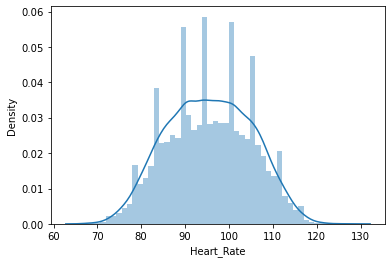

In [75]:
# finding the distribution of Heart Rate column
sns.distplot(calories['Heart_Rate'])

Finding the Correlation in the dataset

1. Positive Correlation 
2. Negative correlation

<AxesSubplot:>

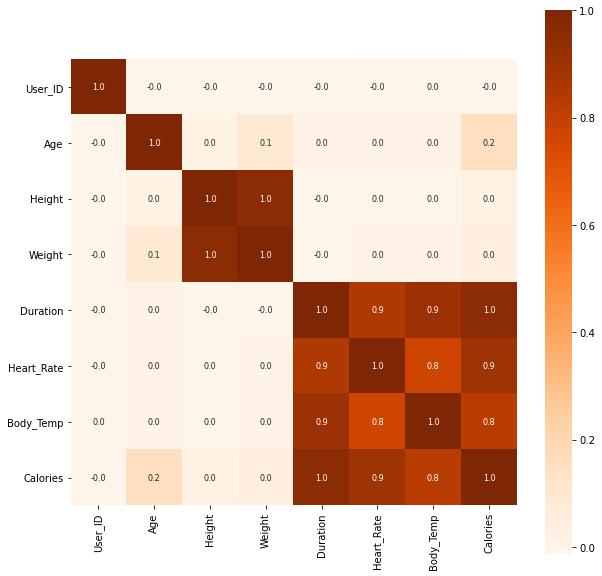

In [76]:
# finding the correlation 
correlation  = calories.corr()
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True , fmt = '.1f', annot=True, annot_kws={'size':8}, cmap='Oranges')

Converting the text data into numerical values 

In [77]:
calories.replace({'Gender':{'male':1,'female':0}}, inplace = True)

In [78]:
calories.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,0,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,0,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,1,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,1,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,0,26,146.0,51.0,16.0,90.0,40.2,72.0


Seperating Features and Target 

In [79]:
X= calories.drop(columns = ['User_ID','Calories'], axis = 1)
Y = calories['Calories']

In [80]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [81]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Spliting the data into training data and test data

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 3)
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training 

XGBOOST REGRESSOR

In [85]:
# loding the model
model = XGBRegressor()


In [86]:
# traning the model with X_train 
model.fit(X_train, Y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Evaluation

Prediction on Test Data

In [92]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[179.14981  100.68549   58.298172 ...  60.724884  21.978842  99.608894]


Mean Absolute Error

In [95]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4796614986062049
